# AI Computer Assignment 5 Phase 2 (Neural Network: TensorFlow & Keras)
Mohammad Saadati - 
_810198410_

## Introduction
Neural networks are one of the most powerful machine learning structures that have found many applications in various scientific and industrial fields in recent years due to the increasing computing power of processors. One of the advantages of these algorithms is that it makes it possible to construct any desired derivative function using only two hidden layers of neurons. Therefore, it is possible to implement and learn nonlinear functions with their help. Due to the recent advances in this structure and its increasing use in industry, very powerful frameworks have been offered to facilitate the creation of very complex and highly efficient neural networks. In this project, we intend to investigate some issues related to neural networks with the `TensorFlow` library and using the `Keras` high-level interface.

In this project, we intend to use neural networks to recognize the **English alphabet** based on their image.

[A-Z Handwritten Alphabets](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format) is a collection of handwritten images of the English alphabet. This dataset contains 372,450 images along with their corresponding labels.

### Import Libraries
In this part, some of the necessary libraries were imported in order to use their helpful functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import cv2
from tensorflow.keras import *
from tensorflow.keras.utils import *
from sklearn.metrics import accuracy_score, classification_report
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import gc

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Phase 1: Data review and preprocessing

### Question 1:
First we load csv file as a DataFrame using pandas library.

In [2]:
# url='https://drive.google.com/file/d/1WIKPIjFiIjYwbKzeURBdiGQg-ubhCrOr/view?usp=sharing'
# path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset_df = pd.read_csv('drive/My Drive/UT/Term6/AI/CA5-P2/A_Z Handwritten Data.csv', dtype="uint8")
dataset_df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 2:
Now we separate the data and the corresponding label of each of them and store them properly.

In [3]:
labels = dataset_df['0'] # .values.tolist()

In [4]:
data = dataset_df.drop(['0'], axis = 1)
data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 3:
Now resize the images to $28 * 28$. To do this, we use the `resize` function

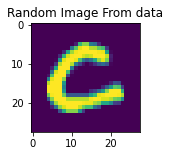


Minimum value in image: 0.0
Maximum value in image: 1.0


1979

In [7]:
# images = [cv2.resize(image, dsize=(25 , 25), interpolation=cv2.INTER_CUBIC) for image in data]
images = [(np.reshape(np.array(row), (28,28)) / 255) for index, row in data.iterrows()]

image = images[random.randint(0 , len(images) - 1)]

plt.figure(figsize = (2 , 2))
plt.imshow(image)
plt.title("Random Image From data")
plt.show()

print("\nMinimum value in image: " + str(np.amin(image)))
print("Maximum value in image: " + str(np.amax(image)))

del images
del image
gc.collect()

### Question 4:
In this part, we print the number of data read and the number of available classes.

In [8]:
print("number of data read:", data.shape[0])
print("number of available classes:", labels.nunique())

number of data read: 372450
number of available classes: 26


### Question 5:
Now calculate the number of images in each category  and draw a bar chart for them.

In [10]:
labels.value_counts().sort_index()

0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: 0, dtype: int64

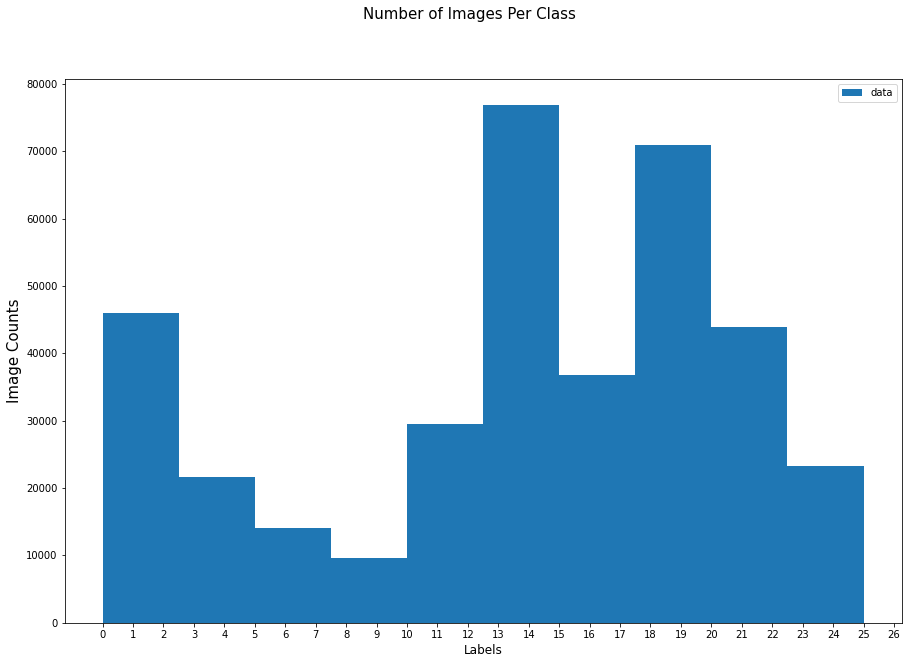

In [13]:
fig = plt.figure(figsize=(15, 10))
plt.hist((labels), label=['data'])
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Image Counts', fontsize = 15)
plt.suptitle('Number of Images Per Class', fontsize = 15)
plt.legend()
plt.xticks(range(0,27))
plt.show()

### Question 6:
In this part, we select and display an image of each class in the train data set. For each image, we display its type along with the image.

========== CLASS No. 0 ==========


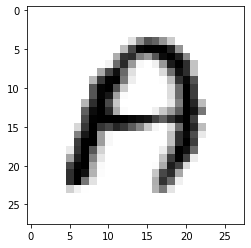

========== CLASS No. 1 ==========


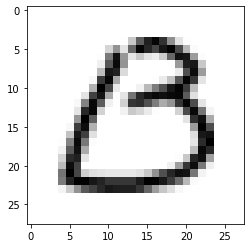

========== CLASS No. 2 ==========


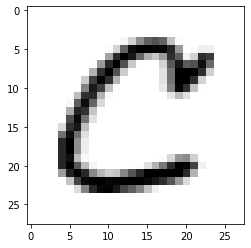

========== CLASS No. 3 ==========


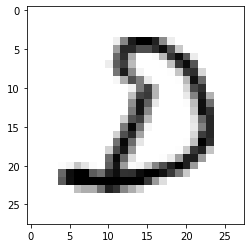

========== CLASS No. 4 ==========


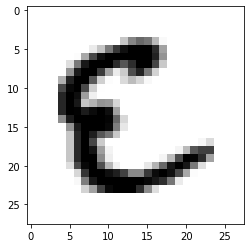

========== CLASS No. 5 ==========


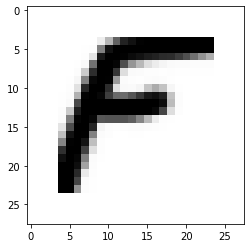

========== CLASS No. 6 ==========


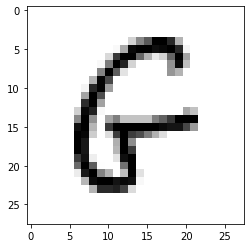

========== CLASS No. 7 ==========


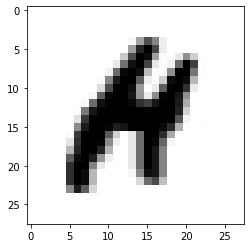

========== CLASS No. 8 ==========


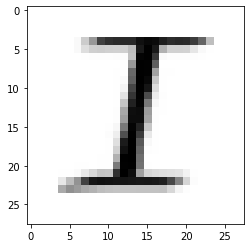

========== CLASS No. 9 ==========


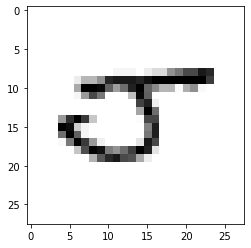

========== CLASS No. 10 ==========


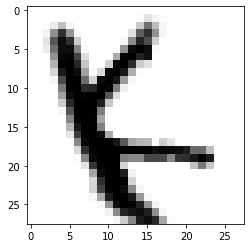

========== CLASS No. 11 ==========


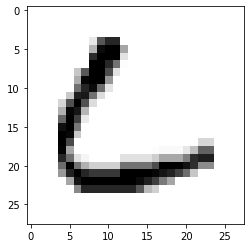

========== CLASS No. 12 ==========


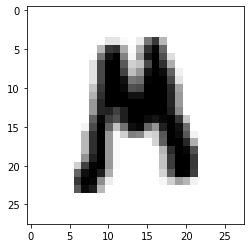

========== CLASS No. 13 ==========


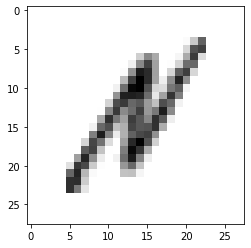

========== CLASS No. 14 ==========


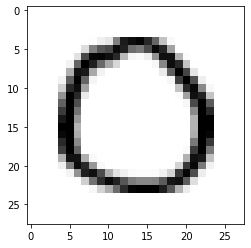

========== CLASS No. 15 ==========


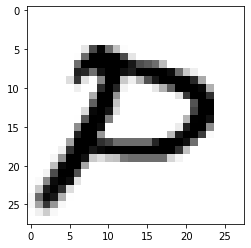

========== CLASS No. 16 ==========


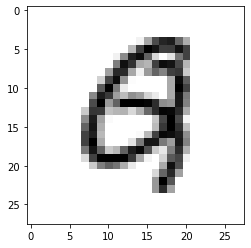

========== CLASS No. 17 ==========


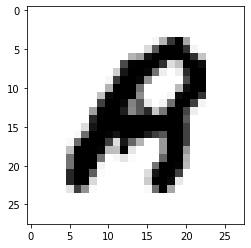

========== CLASS No. 18 ==========


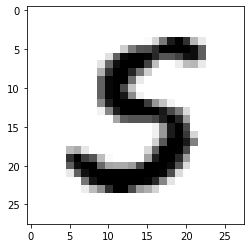

========== CLASS No. 19 ==========


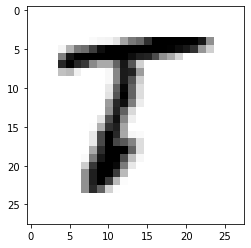

========== CLASS No. 20 ==========


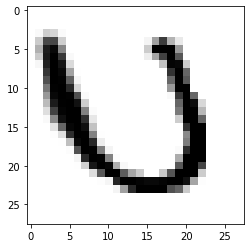

========== CLASS No. 21 ==========


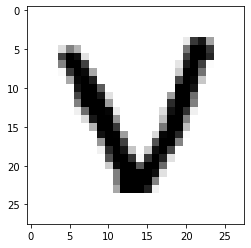

========== CLASS No. 22 ==========


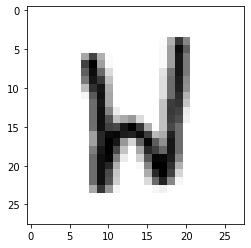

========== CLASS No. 23 ==========


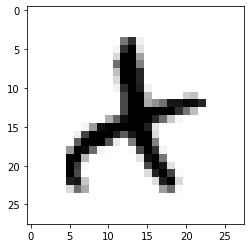

========== CLASS No. 24 ==========


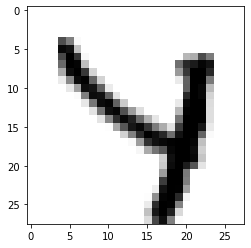

========== CLASS No. 25 ==========


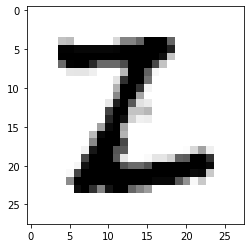

In [ ]:
for i in range(26):
    dd = dataset_df[dataset_df['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    print("========== CLASS No.",str(i),"==========")
    plt.imshow(x, cmap='binary')
    plt.show()

# for i in range(0,10):
#     index = 0
#     while Y_train[index] != i:
#         index += 1
#     image = X_train[index]
#     print("========== CLASS No.",str(i),"==========")
#     plt.figure(figsize = (2 , 2))
#     plt.imshow(image)
#     plt.title(i)
#     plt.show()

### Question 7:
Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.
So we can split our data to train/test to handle this challenge, but again there is another problem.
First of all we have to divide our dataset to two parts trainset and testset so by using `train_test_split` method of `sklearn` and setting `test_size` we'll determine what percentage of our data is for test. For the division `train_test_split` fucntions from `sklearn.model_selection` is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the `type` feature.

The `P` ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.
Assume that we have extremely small data in this situations small p may effect our learning accuracy.
In larger datasets we can do the split with more confidence. After reading some documents online I came to the understanding that 10% to 30% is a good percentage for test size and by experimenting different values I decided to use the value 20%.

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.
`random_state` is for getting the same set of data each time so that we don't get different results, meaning it won't give us random data each time. `random_state` is like the seed that we set for random. 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data , labels , test_size = 0.20 , random_state = 42)

del dataset_df
del data
del labels
gc.collect()

8364

### Question 8:
Some algorithms can work with categorical data directly.

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

There are different ways for handling categirical data.
* <b>Label Encoders:</b> Assigining numbers to each categorical value. 
* <b>One Hot Encoding:</b>  The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. There are also other ways but here we choose to apply one Hot-Encode to categorical variables.
* <b>Ordinal Encoding:</b> We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

Label Encoders aren't a good option when we have no particular ordering in our categories. In these cases, we can use One Hot Encoding which takes a lot of memory since it is adding a new column for each new category. For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [15]:
brand_one_hot = pd.get_dummies(Y_train)
Y_train = pd.concat([Y_train, brand_one_hot], axis = 1)
Y_train = Y_train.iloc[: , 1:]

brand_one_hot = pd.get_dummies(Y_test)
Y_test = pd.concat([Y_test, brand_one_hot], axis = 1)
Y_test = Y_test.iloc[: , 1:]

del brand_one_hot

# encoder = OneHotEncoder()
# onehot = encoder.fit_transform(Y_train).toarray()
# encoder_cols = encoder.get_feature_names()
# Y_train = pd.DataFrame(onehot,columns = encoder_cols)
# encoder = OneHotEncoder()
# onehot = encoder.fit_transform(Y_test).toarray()
# encoder_cols = encoder.get_feature_names()
# Y_test = pd.DataFrame(onehot,columns = encoder_cols)

gc.collect()

88

In machine learning we want numerical values but most of the time there will be categorical values in our dataset. We can convert these values to numerical values. We can deal with categorical values in two different ways. The first one is using label encoding, which assigns one number to each category which here in our dataset for race this method is used in the image names. The second one, that we're using for creating our dataframe, is using one-hot encoding, which will assign different columns to each category. Before we start transforming our data, it is important to figure out if the feature we are working on is ordinal or nominal. An ordinal feature is best described as a feature with natural, ordered categories and the distances between the categories are unknown. We can use LabelEncoder for ordinal features not nominal features. In nominal features we can’t replace the categories by a number since this would imply the features have an order, which is wrong for race in our dataset. So we should use a nominal encoding. The most popular way to encode nominal features is one-hot-encoding. Essentially, each categorical feature with n categories is transformed into n binary features. If the number of the categorical features is low (relative to the amount of data) one-hot encoding will work best. But if the number of the categorical features is large and the dataset is small, one-hot encoding may not be feasible, and regressor may not be able to efficiently learn.

So here since we only have 26 classes in a huge dataframe, race is a nominal feature and also since one hot encoding values are 0 or 1 it can't get biased like in label encoding when the number of unique values are a lot. One hot is kinda normalized and the range of its values is much less, all the values will be multiplied by either 1 or 0 so this will prevent being biased despite label encoding which can multiply values by higher numbers and cause being biased towards values which are multiplied by higher numbers.

## Phase 2: Neural network design

In [ ]:
input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='relu')(output)
output = keras.layers.Dense(512, activation='relu')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
Non-trainable params: 0
_________________________________________________________________


### Model analysis
`summary()` is used to show each layers parameters. summary() will show useful information such as layers and their order in the model, output shape of each layer , number of parameters(weights) in each layer and total number of parameters(weights) in the model.

For the network above first we have flatten the input, so (28, 28) will become (1, 784) which we will show as 784, then we have 1024 neurons in the first layer. So we had 784 neurons in the previous layer and 2048 in this layer. Also we have a bias vector with size of number of the neurons in this layer. Finally putting all of this together we will have the following number of parameters for this layer:

$ 784 * 1024 + 1024 = 803840 $

The number above is equal to the number given by `summary()`.

The calculations for the next layer is exactly the same except the layers will change. 784 will change to 1024 and 1024 will change to 512 also in the new layer the bias size will be 512 so we'll have the following number of parameters for the second hidden layer:

$ 1024 * 512 + 512 = 524800 $

Like before the number above is equal to the corresponding number given by `summary()`.

For the ouput layer the calculations is exactly the same as before but some number's will change as following:

$ 512 * 26 + 26 = 13338 $

Like before the number above is equal to the corresponding number given by `summary()`.

All the parameters are calculated so in total we'll have:

$ 803840 + 524800 + 13338 = 1341978 $

Also the same as `summary()`.

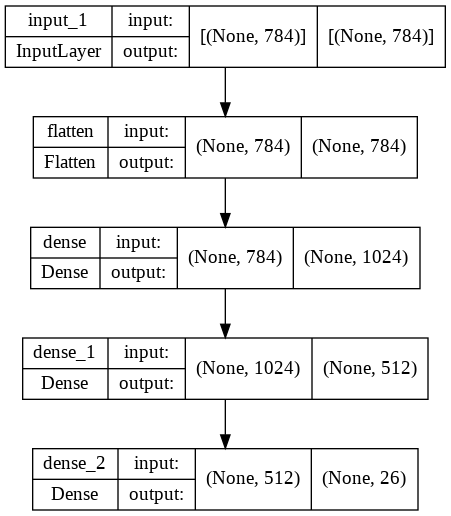

In [ ]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

In [16]:
def model_predict_info():
    plt.plot(log.history["accuracy"], color = 'b')
    plt.plot(log.history["val_accuracy"], color = 'r')
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Test"])
    plt.show()

    plt.plot(log.history["loss"], color = 'b')
    plt.plot(log.history["val_loss"], color = 'r')
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train", "Test"])
    plt.show()

    print("-----------------------------------------------------------------------")

    train_predict = model.predict(X_train.to_numpy(), verbose = 1)
    test_predict = model.predict(X_test.to_numpy(), verbose = 1)

    print("\nTrain classification report:")
    print(classification_report(np.argmax(train_predict, axis = 1), np.argmax(Y_train.to_numpy(), axis = 1)))
    print("\nTest classification report:")
    print(classification_report(np.argmax(test_predict, axis = 1), np.argmax(Y_test.to_numpy(), axis = 1)))

    del train_predict
    del test_predict
    gc.collect()

## Phase 3: Data Classification
In this section, we have to practice the neural network created on the data.

### Scalling data
In this section, scale the amount of data so that the value of each pixel is between 0 and 1 before giving information to the neural network.

Normalization refers to rescaling real valued numeric attributes into the range 0 and 1. Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.Since maximum value in the dataset is 255 it's a good idea to divide every value in the dataset by 255, this will result in each value being between 0 to 1. The reason that this procedure is done is that higher numbers in the network will make it biased meaning that since the difference between values in the range of 0 to 255 is a lot the effect of a value like 1 can easily be vanished comapred to 255 so it's a wise move to scale the values down to make each of them have somewhat of a equal impact in the network. Biased network can result in lower accuracy and all in all a poor model.

In [17]:
X_train = X_train.div(255)
X_test = X_test.div(255)

In [ ]:
log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.2207 - accuracy: 0.9429 - val_loss: 0.1998 - val_accuracy: 0.9472
Epoch 2/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1800 - accuracy: 0.9531 - val_loss: 0.1690 - val_accuracy: 0.9550
Epoch 3/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.1536 - accuracy: 0.9597 - val_loss: 0.1490 - val_accuracy: 0.9611
Epoch 4/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1348 - accuracy: 0.9649 - val_loss: 0.1339 - val_accuracy: 0.9651
Epoch 5/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1203 - accuracy: 0.9684 - val_loss: 0.1215 - val_accuracy: 0.9676
Epoch 6/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.1089 - accuracy: 0.9717 - val_loss: 0.1135 - val_accuracy: 0.9694
Epoch 7/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0997 - accuracy: 0.9741 - val_loss: 0.1058 - val_ac

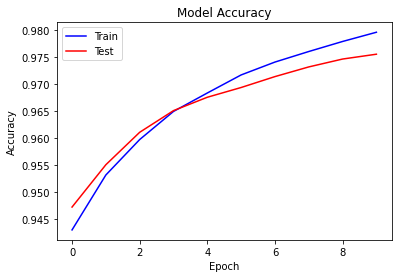

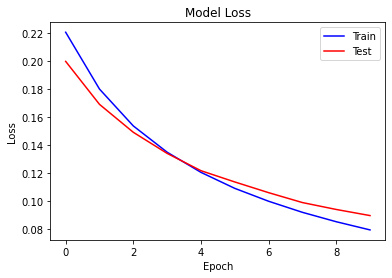

-----------------------------------------------------------------------
2328/2328 [==============================] - 4s 2ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11217
           1       0.96      0.98      0.97      6861
           2       0.98      0.99      0.98     18646
           3       0.95      0.95      0.95      8092
           4       0.97      0.99      0.98      9084
           5       0.95      0.97      0.96       917
           6       0.95      0.97      0.96      4486
           7       0.94      0.98      0.96      5521
           8       0.94      0.99      0.96       839
           9       0.96      0.97      0.97      6770
          10       0.94      0.97      0.95      4375
          11       0.99      0.98      0.98      9334
          12       0.98      0.98      0.98      9910
          13       0.99      0.97      0.98     15570
          14       0.99      0

In [ ]:
model_predict_info()

### Tanh

In [ ]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='tanh')(output)
output = keras.layers.Dense(512, activation='tanh')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.5671 - accuracy: 0.8500 - val_loss: 0.4023 - val_accuracy: 0.8930
Epoch 2/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.3373 - accuracy: 0.9118 - val_loss: 0.2799 - val_accuracy: 0.9274
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.2436 - accuracy: 0.9369 - val_loss: 0.2143 - val_accuracy: 0.9443
Epoch 4/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1918 - accuracy: 0.9501 - val_loss: 0.1775 - val_accuracy: 0.9543
Epoch 5/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.1606 - accuracy: 0.9583 - val_loss: 0.1533 - val_accuracy: 0.9602
Epoch 6/10
9312/9312 [==============================] - 42s 5ms/step - loss: 0.1392 - accuracy: 0.9639 - val_loss: 0.1377 - val_accuracy: 0.9642
Epoch 7/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1236 - accuracy: 0.9680 - val_loss: 0.1247 - val_ac

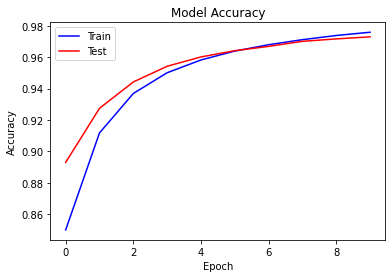

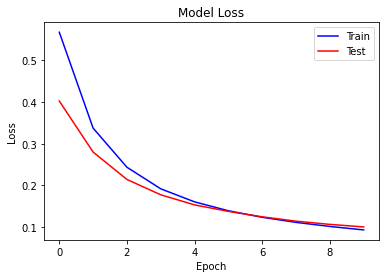

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11095
           1       0.97      0.96      0.96      7069
           2       0.98      0.99      0.98     18421
           3       0.94      0.96      0.95      7961
           4       0.96      0.98      0.97      9032
           5       0.94      0.96      0.95       917
           6       0.93      0.97      0.95      4379
           7       0.95      0.95      0.95      5720
           8       0.94      0.96      0.95       862
           9       0.95      0.95      0.95      6797
          10       0.94      0.96      0.95      4392
          11       0.99      0.97      0.98      9465
          12       0.98      0.98      0.98      9846
          13       0.98      0.97      0.98     15484
          14       0.99      0

In [ ]:
model_predict_info()

### Sigmoid

In [ ]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='sigmoid')(output)
output = keras.layers.Dense(512, activation='sigmoid')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 32s 3ms/step - loss: 1.8485 - accuracy: 0.4921 - val_loss: 1.1199 - val_accuracy: 0.6953
Epoch 2/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.8854 - accuracy: 0.7563 - val_loss: 0.7467 - val_accuracy: 0.7994
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.6789 - accuracy: 0.8132 - val_loss: 0.6301 - val_accuracy: 0.8249
Epoch 4/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.5996 - accuracy: 0.8353 - val_loss: 0.5751 - val_accuracy: 0.8434
Epoch 5/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.5567 - accuracy: 0.8480 - val_loss: 0.5397 - val_accuracy: 0.8524
Epoch 6/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.5278 - accuracy: 0.8559 - val_loss: 0.5202 - val_accuracy: 0.8550
Epoch 7/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.5050 - accuracy: 0.8621 - val_loss: 0.4958 - val_ac

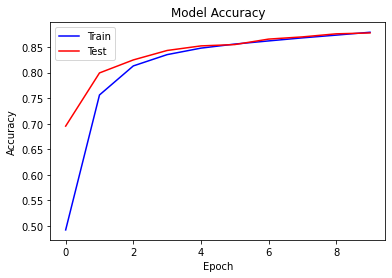

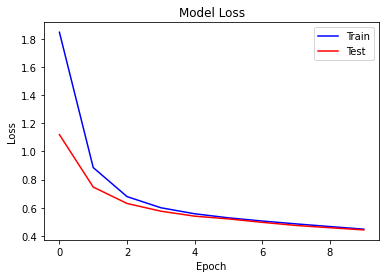

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     11778
           1       0.76      0.86      0.81      6197
           2       0.91      0.92      0.91     18515
           3       0.78      0.85      0.81      7368
           4       0.81      0.78      0.80      9582
           5       0.72      0.91      0.80       736
           6       0.75      0.83      0.79      4122
           7       0.57      0.86      0.69      3835
           8       0.72      0.84      0.78       763
           9       0.77      0.82      0.79      6363
          10       0.75      0.71      0.73      4728
          11       0.95      0.89      0.92      9832
          12       0.87      0.89      0.88      9695
          13       0.88      0.71      0.78     19014
          14       0.97      0

In [ ]:
model_predict_info()

### Leaky RELU

In [ ]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU')(output)
output = keras.layers.Dense(512, activation='LeakyReLU')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# model = Sequential()
# model.add(layers.Input(shape=(784)))
# model.add(layers.Flatten())
# model.add(layers.Dense(1024))
# model.add(layers.LeakyReLU(alpha=0.05))
# model.add(layers.Dense(512))
# model.add(layers.LeakyReLU(alpha=0.05))
# model.add(layers.Dense(26, activation='softmax'))
# model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy",metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.5706 - accuracy: 0.8486 - val_loss: 0.3660 - val_accuracy: 0.9019
Epoch 2/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.3063 - accuracy: 0.9191 - val_loss: 0.2542 - val_accuracy: 0.9330
Epoch 3/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.2226 - accuracy: 0.9418 - val_loss: 0.2006 - val_accuracy: 0.9471
Epoch 4/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1773 - accuracy: 0.9536 - val_loss: 0.1641 - val_accuracy: 0.9572
Epoch 5/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1492 - accuracy: 0.9607 - val_loss: 0.1492 - val_accuracy: 0.9597
Epoch 6/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1296 - accuracy: 0.9658 - val_loss: 0.1301 - val_accuracy: 0.9650
Epoch 7/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1148 - accuracy: 0.9697 - val_loss: 0.1173 - val_ac

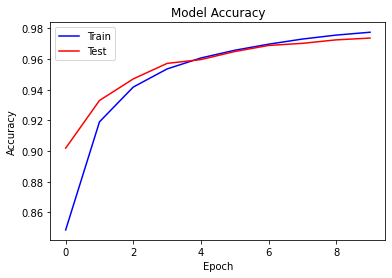

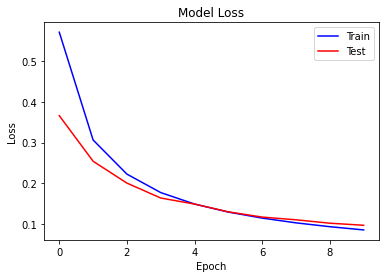

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11271
           1       0.96      0.98      0.97      6845
           2       0.98      0.99      0.98     18534
           3       0.96      0.94      0.95      8312
           4       0.98      0.97      0.97      9287
           5       0.95      0.95      0.95       936
           6       0.96      0.95      0.95      4621
           7       0.96      0.94      0.95      5872
           8       0.93      0.99      0.96       833
           9       0.97      0.94      0.95      7110
          10       0.95      0.95      0.95      4476
          11       0.98      0.98      0.98      9324
          12       0.97      0.98      0.98      9786
          13       0.97      0.99      0.98     14988
          14       0.99      0

In [ ]:
model_predict_info()

## Investigating the impact of offending changes and questions:

### Part I: Optimizer

#### Questions 1: What is momentum
Momentum takes past gradients into account to smooth out the steps of gradient descent meaning that it accelerates gradient descent in the relevant direction and dampens oscillations. When momentum is 0 the formula below is used in SGD:

$ w = w - learningRate * g $

But when momentum is larger than 0 the formula below is used:

$ w = w + momentum * velocity - learningRate * g $

Exponential Smoothing is one of the simplest ways to add smoothing to your data. In our case, the Exponential Smoothing is called Momentum and it allows the optimizer to maintain the velocity and trajectory from previous time steps to affect the present. The weighting of previous time steps drops off exponentially so the most recent time step has the greatest impact.

Momentum optimizer is faster and better at optimizing the model in our problem. momentum is an easy and quick way to improve upon standard Stochastic Gradient Descent for optimizing Neural Network models.

Momentum or SGD with momentum is a method which helps us to accelerate gradient vectors in the right directions. Momentum is an average of gradients that changes during the time and we use it to update weight in each step. Therefore, it leads to faster convergence. It is mostly used in neural networks considering the size of data in NNs makes a considerable time difference while training gradients. It can be used to handle noisy gradients. Moreover, it can handle extremely small gradients.

#### Questions 2:

##### Momentum = 0.5

In [ ]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU')(output)
output = keras.layers.Dense(512, activation='LeakyReLU')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.4516 - accuracy: 0.8798 - val_loss: 0.2717 - val_accuracy: 0.9277
Epoch 2/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.2083 - accuracy: 0.9449 - val_loss: 0.1702 - val_accuracy: 0.9548
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1479 - accuracy: 0.9605 - val_loss: 0.1383 - val_accuracy: 0.9623
Epoch 4/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1175 - accuracy: 0.9685 - val_loss: 0.1168 - val_accuracy: 0.9686
Epoch 5/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0980 - accuracy: 0.9738 - val_loss: 0.1027 - val_accuracy: 0.9719
Epoch 6/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0846 - accuracy: 0.9774 - val_loss: 0.0953 - val_accuracy: 0.9739
Epoch 7/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0733 - accuracy: 0.9803 - val_loss: 0.0875 - val_ac

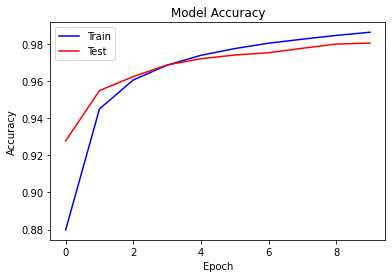

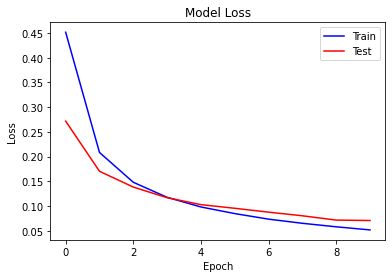

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11004
           1       0.98      0.99      0.98      6932
           2       0.99      0.98      0.99     18857
           3       0.98      0.94      0.96      8439
           4       0.99      0.99      0.99      9205
           5       0.97      0.98      0.98       922
           6       0.96      0.99      0.97      4426
           7       0.94      1.00      0.97      5408
           8       0.97      0.99      0.98       867
           9       0.97      0.97      0.97      6825
          10       0.98      0.97      0.97      4513
          11       0.98      0.99      0.99      9178
          12       1.00      0.97      0.98     10093
          13       0.99      0.98      0.99     15392
          14       0.99      0

In [ ]:
model_predict_info()

Based on the result, this model is more optimal in comparison to the other model (with another values for momentum) and the loss decreases with higher rate.

##### Momentum = 0.9

In [ ]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU')(output)
output = keras.layers.Dense(512, activation='LeakyReLU')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.2584 - accuracy: 0.9282 - val_loss: 0.1319 - val_accuracy: 0.9628
Epoch 2/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1159 - accuracy: 0.9670 - val_loss: 0.0973 - val_accuracy: 0.9717
Epoch 3/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0878 - accuracy: 0.9743 - val_loss: 0.0904 - val_accuracy: 0.9739
Epoch 4/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0718 - accuracy: 0.9788 - val_loss: 0.0954 - val_accuracy: 0.9721
Epoch 5/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0768 - val_accuracy: 0.9784
Epoch 6/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 7/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0687 - val_ac

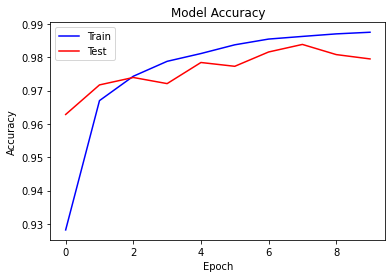

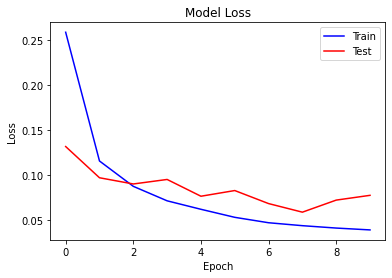

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11282
           1       0.99      0.98      0.99      7029
           2       0.97      1.00      0.98     18182
           3       0.97      0.96      0.97      8168
           4       0.98      0.99      0.99      9179
           5       0.99      0.93      0.96       989
           6       0.96      0.99      0.98      4434
           7       0.86      1.00      0.92      4945
           8       0.96      1.00      0.98       849
           9       0.98      0.98      0.98      6855
          10       0.95      0.98      0.97      4321
          11       0.99      0.99      0.99      9262
          12       0.99      0.99      0.99      9842
          13       0.99      0.98      0.98     15406
          14       0.99      0

In [ ]:
model_predict_info()

Based on the result, using 0.9 for momentum does not have any positive effect and the rate of the changing in loss has been decreased.

##### Momentum = 0.98

In [21]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(64, activation='LeakyReLU')(output)
output = keras.layers.Dense(32, activation='LeakyReLU')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.98), loss='categorical_crossentropy', metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.5604 - accuracy: 0.8550 - val_loss: 0.5183 - val_accuracy: 0.8849
Epoch 2/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.6281 - accuracy: 0.8655 - val_loss: 0.7349 - val_accuracy: 0.8689
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.8035 - accuracy: 0.8551 - val_loss: 0.9625 - val_accuracy: 0.8382
Epoch 4/10
9312/9312 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.5762 - val_loss: nan - val_accuracy: 0.0377
Epoch 5/10
9312/9312 [==============================] - 29s 3ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 6/10
9312/9312 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 7/10
9312/9312 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 8/1

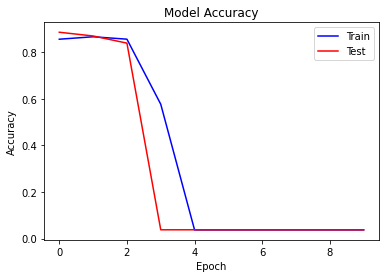

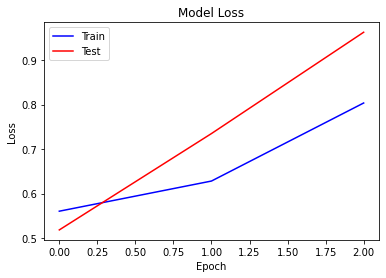

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

              precision    recall  f1-score   support

           0       1.00      0.04      0.07    297960
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model_predict_info()

Base on the result, the weights in this model are not updating in a correct direction and it seems that this model will not reach to an optimal solution.

As we can observer in the previous outputs, When momentum gets high It misses the optimal values.
For example from the physics prespective when a ball gets down the hill with lots of acceleration it misses the point.
Really low momentum values are prone to not learning and getting stuck in the local minima.

#### Questions 3: Large momentum
As shown here increasing momentum rapidly doesn't always help the model work better. With a reasonably higher momentum the predictions become more stable but with really high momentums the model will became stable for just one class and will predict all the data in that class so this means that higher momentum is good but too high and it'll cause problems.

As the momentum increases, the speed of our movement towards the answer increases in such a way that it becomes difficult to reach the answer meaning that if for example momentum is too high we'll overshoot the answer each time and never reach it. It's better to move slower as we get closer to the answer. Higher momentum will make the model almost random and also in each propagation the weights will change more rapidly which isn't what we want.

With momentum we have to hit the sweet spot, not too high to overshoot not too low to be very slow, we have to tune it as much as possible. 

Momentum or SGD with momentum is a method which helps us to accelerate gradient In fact, momentum makes each step of the learning process dependent on its previous. If we set momentum and learning rate to large values, we will have bigger steps, and based on the dependency that we mentioned above, the next steps will be larger and larger. As a result, weights won't be updated in a correct way, and they will never reach optimal values. Therefore, large momentum does not necessarily lead to higher accuracies.

Choosing a really high value for the momentum term is not always a good choice, because it may miss the minimum.
Maybe one good choice is to start with little momentum values and then gradually add to the momentum value.



#### Questions 4: Adam Optimizer
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data and more efficiently.
adam has so many effective features:

* Straightforward to implement
* Computationally efficient
* Little memory requirements
* Appropriate for problems with very noisy and/or sparse gradients
* ...

In [ ]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU')(output)
output = keras.layers.Dense(512, activation='LeakyReLU')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 10, batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2896 - accuracy: 0.9206 - val_loss: 0.2114 - val_accuracy: 0.9451
Epoch 2/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1885 - accuracy: 0.9506 - val_loss: 0.1474 - val_accuracy: 0.9625
Epoch 3/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1630 - accuracy: 0.9581 - val_loss: 0.1562 - val_accuracy: 0.9632
Epoch 4/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1498 - accuracy: 0.9624 - val_loss: 0.1522 - val_accuracy: 0.9656
Epoch 5/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1428 - accuracy: 0.9653 - val_loss: 0.1792 - val_accuracy: 0.9613
Epoch 6/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.1381 - accuracy: 0.9673 - val_loss: 0.1624 - val_accuracy: 0.9649
Epoch 7/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1362 - accuracy: 0.9688 - val_loss: 0.1648 - val_ac

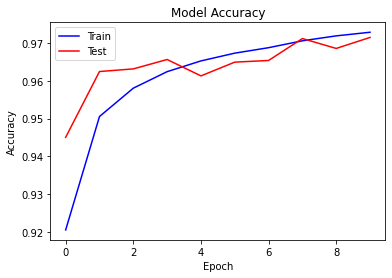

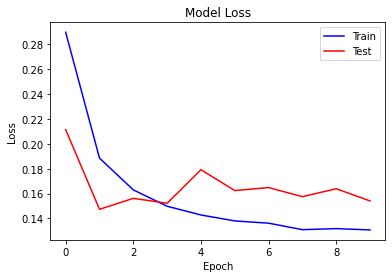

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10859
           1       0.96      0.97      0.97      6954
           2       0.99      0.98      0.98     18763
           3       0.91      0.96      0.93      7654
           4       0.98      0.96      0.97      9485
           5       0.93      0.99      0.96       875
           6       0.92      0.99      0.95      4284
           7       0.96      0.93      0.95      5931
           8       0.91      0.97      0.94       827
           9       0.97      0.95      0.96      6969
          10       0.93      0.98      0.95      4244
          11       0.97      0.99      0.98      9068
          12       0.96      0.99      0.98      9554
          13       0.97      0.97      0.97     15260
          14       0.99      0

In [ ]:
model_predict_info()

Based on the result, Adam is much faster than SGD and the model converges in earlier epochs in comparison to SGD. Moreover, it works fine with default hyperparmeters.  But as we can see Adam has convergence problems that often SGD + momentum can converge better with longer training time.

### Part II: Epochs

#### Epochs = 20

In [23]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU')(output)
output = keras.layers.Dense(512, activation='LeakyReLU')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 20, batch_size=32)

Epoch 1/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2923 - accuracy: 0.9199 - val_loss: 0.2156 - val_accuracy: 0.9395
Epoch 2/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1880 - accuracy: 0.9511 - val_loss: 0.1955 - val_accuracy: 0.9522
Epoch 3/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1626 - accuracy: 0.9582 - val_loss: 0.1614 - val_accuracy: 0.9596
Epoch 4/20
9312/9312 [==============================] - 32s 3ms/step - loss: 0.1480 - accuracy: 0.9627 - val_loss: 0.1547 - val_accuracy: 0.9614
Epoch 5/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1402 - accuracy: 0.9656 - val_loss: 0.1491 - val_accuracy: 0.9673
Epoch 6/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1338 - accuracy: 0.9680 - val_loss: 0.1644 - val_accuracy: 0.9637
Epoch 7/20
9312/9312 [==============================] - 32s 3ms/step - loss: 0.1326 - accuracy: 0.9693 - val_loss: 0.1507 - val_ac

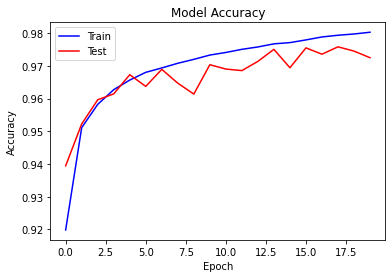

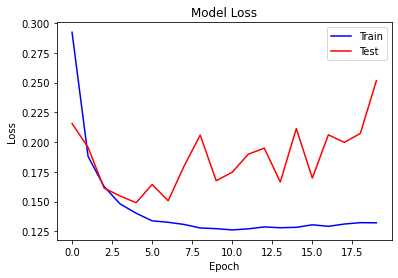

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11365
           1       0.87      1.00      0.93      6093
           2       0.99      0.98      0.98     18873
           3       0.94      0.97      0.95      7788
           4       0.98      0.99      0.99      9182
           5       0.99      0.87      0.92      1063
           6       0.98      0.86      0.92      5248
           7       0.99      0.92      0.95      6152
           8       0.98      0.98      0.98       879
           9       0.97      0.97      0.97      6800
          10       0.97      0.98      0.97      4460
          11       0.99      0.99      0.99      9273
          12       0.98      0.98      0.98      9887
          13       0.95      1.00      0.97     14555
          14       0.98      0

In [24]:
model_predict_info()

#### Question 1: Why train neural network with multiple epochs
In each epoch, weights are updated for several times and the whole data is checked. It is undeniable that we want to get good performance on non-training data and usually that takes more than one pass over the training data. Moreover, it is typical that gradient descent does not reach a global or local minimum after the first epoch. So, training just one epoch can lead to underfitting. As a result, we use multiple epochs.

Training a neural network involves optimizing a large set of parameters which are heavily interdependent. Because of this, it can take a lot of labelled training examples before the network even settles into an area of the solution space which is close to the optimal solution. The whole situation is made worse by the stochastic nature of batch gradient descent and the common practice of starting with a large learning rate and slowly lowering it. In short, the optimization algorithm is very data-hungry.

The sort of multidimensional data, neural nets require is expensive to label and takes up large amounts of storage space. Thus, even though you need to feed your network lots of data, the amount of samples available is generally much lower than the number of samples you need to reach a useful optimum. There may be enough information in these training samples, but the gradient descent algorithm takes time to extract it. You can make up for the limited number of samples by making multiple passes over the data. This will give the algorithm time to converge, without requiring an impractical amount of data. So in total batch gradient descent requires more iterations to converge than one pass over the data set will allow.

It's safe to say that in some special problems 1 epoch can be enough we will get good accuracy and everything but it's importent to note that gradient Descent is an iterative process so updating the weights with single pass or one epoch is not enough. One epoch leads to underfitting. As the number of epochs increases, more times the weights are changed in the neural network so the curve goes from underfitting to optimal to overfitting curve. So in total since updating the weights needs multiple number of passings(epochs) we'll have to train the model for multiple epochs.

After a lot of epochs the test accuracy starts to plummet but the train accuracy keeps on rising this is a clear sign of overfitting doing well on training set but doing horrible on test set. Even Loss value we can easily show overfitting, in the training set the loss keeps lowering but in test set loss value rises rapidly. So the best option is to train the model up until the very moment that overfitting starts by this approach we will prevent underfitting and also won't cause overfitting.


#### Question 2: More epochs
If we set the number of epochs to a very large number, it may lead to have and overfitted model, because we train the data for many times and our model will start to model the noises in our data and it is a sign of overfitting and the accuracy of the test data will be reduced.

Increasing number of epochs by a lot will definitely result in overfitting so it won't be a good idea. To avoid the problem we have to hit the sweet spot meaning that we know really low number of epochs will result in underfitting and really high number of epochs will result in overfitting so the best possible way is to find where the underfitting stops and overfitting starts that is the best place since it neither has underfitting nor overfitting. That is the best possible epoch to achieve. But if we want to make our model better and overcome overfitting there all a lot of ways to do it and make the situation better like as we saw we can tune our hyperparameters, use different number of nodes in each hidden layer, use different number of hidden layers, study our data and know what approach to make based on the data, use other models and many more.

### Part III: Loss Function

#### Question 1: MSE
As we can see it works worse in comparison to the categorical cross entropy,
And it does not learn well.

Using MSE for classification is not a good choice because,
It assumes that the data has a guassian distribution and this may not be true.
The next reason is that it is not convex and it may get stuck in places and don't catch the global minumum.
MSE is more commonly used in Regression problems.

In [25]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU')(output)
output = keras.layers.Dense(512, activation='LeakyReLU')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 20, batch_size=32)

Epoch 1/20
9312/9312 [==============================] - 33s 3ms/step - loss: 0.0118 - accuracy: 0.8336 - val_loss: 0.0143 - val_accuracy: 0.8114
Epoch 2/20
9312/9312 [==============================] - 32s 3ms/step - loss: 0.0139 - accuracy: 0.8183 - val_loss: 0.0167 - val_accuracy: 0.7815
Epoch 3/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.0152 - accuracy: 0.8013 - val_loss: 0.0130 - val_accuracy: 0.8306
Epoch 4/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.0158 - accuracy: 0.7942 - val_loss: 0.0146 - val_accuracy: 0.8100
Epoch 5/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.0174 - accuracy: 0.7733 - val_loss: 0.0174 - val_accuracy: 0.7730
Epoch 6/20
9312/9312 [==============================] - 32s 3ms/step - loss: 0.0169 - accuracy: 0.7807 - val_loss: 0.0170 - val_accuracy: 0.7781
Epoch 7/20
9312/9312 [==============================] - 32s 3ms/step - loss: 0.0165 - accuracy: 0.7848 - val_loss: 0.0144 - val_ac

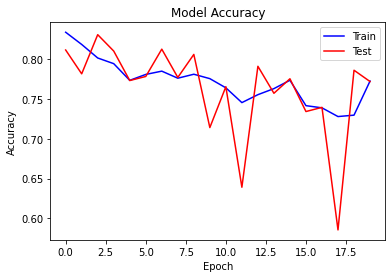

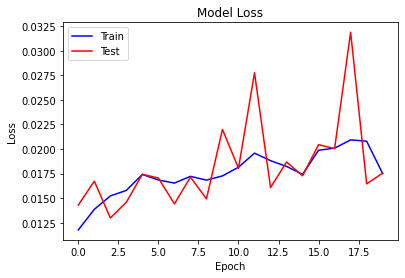

-----------------------------------------------------------------------
2328/2328 [==============================] - 4s 2ms/step

Train classification report:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.60      0.69     15310
           1       0.69      0.52      0.59      9176
           2       0.84      0.92      0.88     17117
           3       0.86      0.37      0.52     18684
           4       0.76      0.70      0.73     10079
           5       0.43      0.86      0.58       467
           6       0.63      0.66      0.64      4366
           7       0.56      0.51      0.53      6333
           8       0.00      0.00      0.00         0
           9       0.59      0.61      0.60      6530
          10       0.35      0.71      0.47      2211
          11       0.72      0.87      0.79      7617
          12       0.73      0.86      0.79      8364
          13       0.73      0.77      0.75     14529
          14       0.81      0.89      0.85     41933
          15       0.91      0.75      0.82     18751
          16       0.42      0.73      0.53      2696
          17       0.61    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      0.59      0.69      3935
           1       0.69      0.51      0.58      2283
           2       0.84      0.92      0.88      4316
           3       0.87      0.37      0.52      4762
           4       0.78      0.70      0.73      2472
           5       0.39      0.90      0.54       100
           6       0.63      0.66      0.65      1131
           7       0.55      0.48      0.52      1665
           8       0.00      0.00      0.00         0
           9       0.59      0.62      0.60      1609
          10       0.32      0.71      0.45       514
          11       0.73      0.89      0.80      1884
          12       0.73      0.86      0.79      2121
          13       0.72      0.76      0.74      3573
          14       0.80      0.89      0.84     10525
          15       0.91      0.75      0.82      4674
          16       0.41      0.73      0.52       650
          17       0.61    

In [26]:
model_predict_info()

Based on the result, by using this loss function, the rate of the learning process decreased and it seems that it will not converge and it refers to the reasons that we mentioned above.

#### Question 2: Why MSE not good
There are two reasons that MSE loss function is not good for classification problems:

1. when we use MSE, it means we assume the underlying data has been generated from a normal distribution. In Bayesian terms this means we assume a Gaussian prior. While in fact, our dataset can be classified into three categories. As a result, it is not from a normal distribution.

2. the MSE function is non-convex for classification. In other words, if a classification model is trained with MSE loss function, it is not guaranteed to minimize the loss function. This is because MSE function expects real-valued inputs in range (-∞, ∞), while classification models output probabilities in range (0,1) through the activation function.

As shown above the loss value while using MSE is constant meaning that the weights aren't updated. This will result in the network predicting everything as white class which is horrible Categorical Crossentropy is much better for our situation.

The Mean Squared Error is used as a default metric for evaluation of the performance of most regression algorithms meaning that MSE loss function is mostly used in regressions.

Using MSE means that we assume that the underlying data has been generated from a normal distribution in reality, a dataset that can be classified into categories is not always from a normal distribution. Also if classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range (-inf, inf), while here classification models output probabilities in range (0,4). Also as said before MSE is a good choice for a Cost function when we are doing Linear Regression.

### Part IV: Regularization
As we mentioned in previous parts, if we train our model for more epochs, the risk of overfitting will be increased. One of the techniques to avoid overfitting is to use regularization methods that we want to discuss in this part.

Adding the regularization component will drive the values of the weight matrix down. This will effectively decorrelate the neural network.

#### Question 1: L2
In this approach we have the term (0.5)λw^2 and it helps us to control the weights.
It means that it does not let them to grow a lot. It helps us keep the weights small and prevent overfitting.
We can observer this in the output as well.

L2 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large weight values meaning that with L2 regularization you add a fraction of the sum of the squared weight values to the base error so on each training iteration, each weight is decayed toward zero by a small fraction of the weight's current value resulting in regularization and better results.

In [27]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU', kernel_regularizer=regularizers.l2(0.0001))(output)
output = keras.layers.Dense(512, activation='LeakyReLU', kernel_regularizer=regularizers.l2(0.0001))(output)
output = keras.layers.Dense(26, activation='softmax', kernel_regularizer=regularizers.l2(0.0001))(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 20, batch_size=32)

Epoch 1/20
9312/9312 [==============================] - 37s 4ms/step - loss: 0.3929 - accuracy: 0.9205 - val_loss: 0.2645 - val_accuracy: 0.9523
Epoch 2/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2618 - accuracy: 0.9522 - val_loss: 0.2483 - val_accuracy: 0.9551
Epoch 3/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2362 - accuracy: 0.9583 - val_loss: 0.2454 - val_accuracy: 0.9564
Epoch 4/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2244 - accuracy: 0.9613 - val_loss: 0.2513 - val_accuracy: 0.9542
Epoch 5/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2170 - accuracy: 0.9632 - val_loss: 0.2149 - val_accuracy: 0.9645
Epoch 6/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2126 - accuracy: 0.9641 - val_loss: 0.2115 - val_accuracy: 0.9644
Epoch 7/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2083 - accuracy: 0.9653 - val_loss: 0.2087 - val_ac

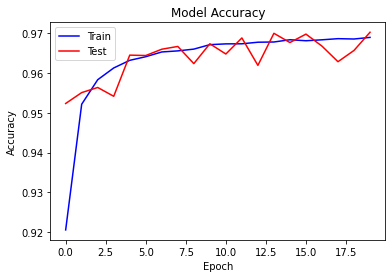

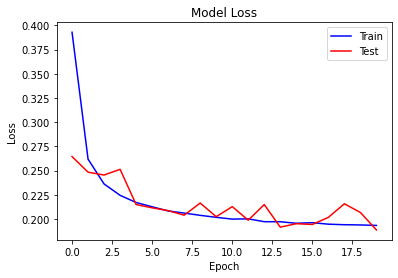

-----------------------------------------------------------------------
2328/2328 [==============================] - 3s 1ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     11589
           1       0.96      0.95      0.95      7105
           2       0.98      0.98      0.98     18610
           3       0.94      0.94      0.94      8098
           4       0.98      0.93      0.95      9788
           5       0.96      0.87      0.91      1021
           6       0.93      0.98      0.95      4330
           7       0.93      0.98      0.95      5489
           8       0.87      0.99      0.93       781
           9       0.96      0.94      0.95      6987
          10       0.89      0.98      0.94      4044
          11       0.97      0.97      0.97      9239
          12       0.97      0.98      0.98      9735
          13       0.98      0.97      0.97     15431
          14       0.99      0

In [28]:
model_predict_info()

Based on the result, the loss curve is smoother and it shows that our model has not faced with overfitting, during the learning process.

#### Question 2: dropout
In this approach we drop some neurons with respect to a probability and it helps us prevent overfitting.
We will learn just some values in each part and it helps generalizing better.
We can see the following observation in the output as well.

L2 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large weight values meaning that with L2 regularization you add a fraction of the sum of the squared weight values to the base error so on each training iteration, each weight is decayed toward zero by a small fraction of the weight's current value resulting in regularization and better results.

In [29]:
del input
del output
del model
del log
gc.collect()

input = keras.layers.Input(shape=(784))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='LeakyReLU')(output)
output = keras.layers.Dropout(rate=0.1)(output)
output = keras.layers.Dense(512, activation='LeakyReLU')(output)
output = keras.layers.Dropout(rate=0.1)(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

log = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) , epochs = 20, batch_size=32)

Epoch 1/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.3349 - accuracy: 0.9097 - val_loss: 0.2118 - val_accuracy: 0.9455
Epoch 2/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2501 - accuracy: 0.9368 - val_loss: 0.2175 - val_accuracy: 0.9486
Epoch 3/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2335 - accuracy: 0.9433 - val_loss: 0.2234 - val_accuracy: 0.9480
Epoch 4/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2224 - accuracy: 0.9467 - val_loss: 0.1873 - val_accuracy: 0.9574
Epoch 5/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2239 - accuracy: 0.9480 - val_loss: 0.1842 - val_accuracy: 0.9562
Epoch 6/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2173 - accuracy: 0.9508 - val_loss: 0.1787 - val_accuracy: 0.9614
Epoch 7/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2164 - accuracy: 0.9521 - val_loss: 0.2103 - val_ac

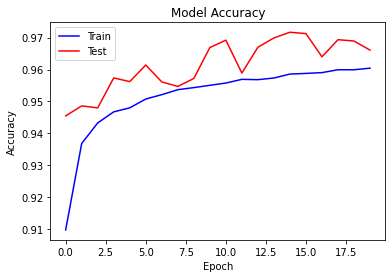

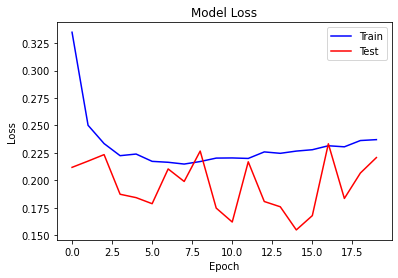

-----------------------------------------------------------------------
2328/2328 [==============================] - 4s 2ms/step

Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     10702
           1       0.98      0.95      0.96      7203
           2       0.94      0.99      0.96     17601
           3       0.84      0.98      0.90      6906
           4       0.97      0.95      0.96      9395
           5       0.92      0.99      0.96       866
           6       0.93      0.95      0.94      4522
           7       0.97      0.95      0.96      5909
           8       0.97      0.92      0.95       933
           9       0.90      0.98      0.94      6292
          10       0.96      0.96      0.96      4509
          11       0.99      0.92      0.95     10019
          12       0.98      0.99      0.98      9766
          13       0.98      0.98      0.98     15266
          14       0.99      0

In [30]:
model_predict_info()

Here, the loss curve is smoother than the previous part and it seems that this method can deal with overfitting in a better way.

By using L2 regularization we improved the test accuracy and it's also noticeable that the model is not overfitting. Adding the dropout will make the results even better.